In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/gender_classification_v7.csv', sep=',')
print(df.info(), "\n")
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None 



,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print(df_numeric)

['long_hair' 'forehead_width_cm' 'forehead_height_cm' 'nose_wide'
 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   


In [4]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
print(df_non_numeric)

['gender']
      gender
0       Male
1     Female
2       Male
3       Male
4     Female
...      ...
4996  Female
4997  Female
4998  Female
4999  Female
5000    Male

[5001 rows x 1 columns]


In [5]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['gender']

In [6]:
df_cat = df[categorical_columns] #отберем только те столбцы в которых присутствует категориальная перемнная
df_cat.head()

,gender
0,Male
1,Female
2,Male
3,Male
4,Female


In [7]:
from sklearn.preprocessing import OrdinalEncoder

education_column = df_cat[["gender"]]

print(df_cat['gender'].unique()) #посмотрим какие виды образования присутствуют в выборке

encoder = OrdinalEncoder()   # вызываем кодировщик
encoder  = encoder.fit(df_cat[['gender']])
df_cat['gender'] = encoder.transform(df_cat[['gender']])
df_cat

['Male' 'Female']


<ipython-input-7-f44504ae0568>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['gender'] = encoder.transform(df_cat[['gender']])


,gender
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
4996,0.0
4997,0.0
4998,0.0
4999,0.0


In [8]:
df['gender']=df_cat
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1.0
1,0,14.0,5.4,0,0,1,0,0.0
2,0,11.8,6.3,1,1,1,1,1.0
3,0,14.4,6.1,0,1,1,1,1.0
4,1,13.5,5.9,0,0,0,0,0.0
5,1,13.0,6.8,1,1,1,1,1.0
6,1,15.3,6.2,1,1,1,0,1.0
7,0,13.0,5.2,0,0,0,0,0.0
8,1,11.9,5.4,1,0,1,1,0.0
9,1,12.1,5.4,0,0,0,0,0.0


In [9]:
X=df.iloc[:,:6]
y=df.iloc[:,7]
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1.0
1,0,14.0,5.4,0,0,1,0,0.0
2,0,11.8,6.3,1,1,1,1,1.0
3,0,14.4,6.1,0,1,1,1,1.0
4,1,13.5,5.9,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0.0
4997,1,11.9,5.4,0,0,0,0,0.0
4998,1,12.9,5.7,0,0,0,0,0.0
4999,1,13.2,6.2,0,0,0,0,0.0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [11]:
from sklearn.linear_model import LinearRegression # подключим модель линейной регрессии
linr = LinearRegression() # создадим ее
lin_clf = LinearRegression() # создаем модель линейной регресии
lin_clf.fit(X_train, y_train) # обучаем ее
print(f'Обученные параметры: \nСмещение b={lin_clf.intercept_:6.4f} ')
print('Множители a= ',lin_clf.coef_)

Обученные параметры: 
Смещение b=-0.7145 
Множители a=  [-0.02830064  0.02876013  0.05903073  0.38467452  0.30505403  0.32633813]


In [12]:
y_predicted = lin_clf.predict(X_test) # рассчитываем выходы модели на тестовых данных
score=lin_clf.score(X_test,y_test)# считаем ошибку
print(score)#

0.7973642344202587


In [13]:
y_pred_class=np.rint(y_predicted)
y_pred_class[y_pred_class>2]=2
y_pred_class[y_pred_class<0]=0
y_pred_class=y_pred_class.astype('int')
score=np.sum(y_pred_class==y_test)/len(y_test)
score

0.9568172730907637

In [17]:
#логистическая регрессия
from sklearn.linear_model import LogisticRegression
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [18]:
from sklearn import metrics
# оценка точности модели
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1223
         1.0       0.96      0.96      0.96      1278

    accuracy                           0.96      2501
   macro avg       0.96      0.96      0.96      2501
weighted avg       0.96      0.96      0.96      2501



Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

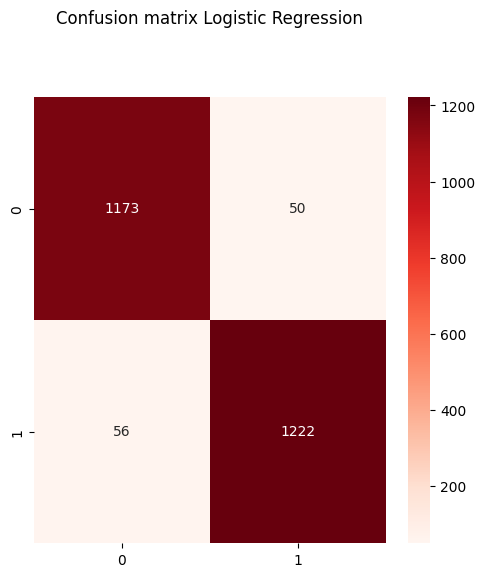

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

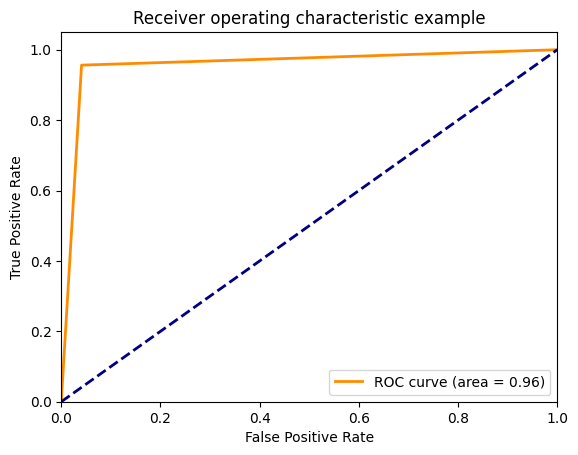

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test > 0, y_score  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()